In [1]:
import os
os.chdir('/Users/melon/Documents/Stat/assignment_1/Data')
os.getcwd()

'/Users/melon/Documents/Stat/assignment_1/Data'

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

In [3]:
sns.set_color_codes()
def remove_outlier_IQR(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

def remove_not_assign_region(df):
    for index,row in df.iterrows():
        if ((row['Region'] == 'Africa') | (row['Region'] == 'Northern Europe') | (row['Region'] == 'Southeast Asia' )):
            continue
        else:
            df.drop(index , inplace=True)

In [4]:
regions = pd.read_csv('countries_regions.csv')
regions

,CountryName,Region,ThirdWorld
0,Afghanistan,South Asia,1
1,Albania,Eastern Europe,0
2,Algeria,Africa,0
3,American Samoa,Australia and Oceanea,0
4,Andorra,Western Europe,0
...,...,...,...
212,Virgin Islands (U.S.),North America,0
213,West Bank and Gaza,Middle East,0
214,"Yemen, Rep.",Middle East,1
215,Zambia,Africa,1


# GDP

In [5]:
gdp = pd.read_csv('gdp.csv')

<AxesSubplot:>

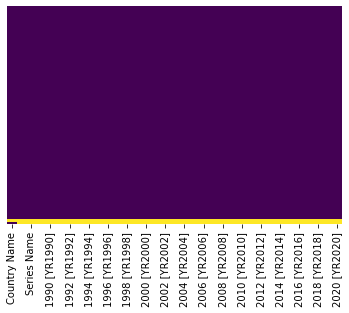

In [6]:
sns.heatmap(gdp.isnull() , yticklabels=False, cbar=False , cmap='viridis')

<AxesSubplot:>

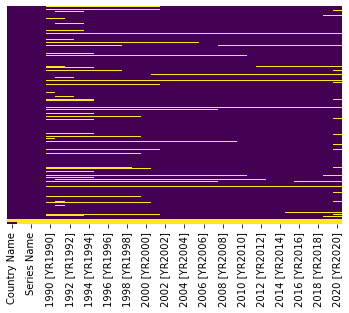

In [7]:
gdp = gdp.replace({'..':np.nan})
sns.heatmap(gdp.isnull() , yticklabels=False, cbar=False , cmap='viridis')

In [8]:
dfa = regions.join(gdp['2008 [YR2008]'])
dfb = regions.join(gdp['2018 [YR2018]'])

In [9]:
# remove region that is not assigned
remove_not_assign_region(dfa)
remove_not_assign_region(dfb)
        
dfa.drop(["ThirdWorld"] , axis=1 , inplace=True)
dfb.drop(["ThirdWorld"] , axis=1 , inplace=True)
dfa.dropna(inplace=True)
dfb.dropna(inplace=True)


<AxesSubplot:>

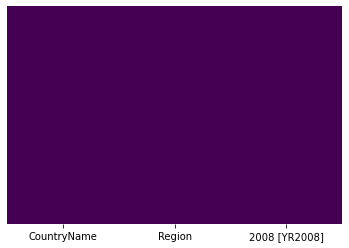

In [10]:
sns.heatmap(dfa.isnull() , yticklabels=False, cbar=False , cmap='viridis')

In [11]:
dfa.rename(columns = {'2008 [YR2008]':'GDP[2008]'}, inplace=True)
dfb.rename(columns = {'2018 [YR2018]':'GDP[2018]'}, inplace=True)
dfa = dfa.astype({'GDP[2008]':float})
dfb = dfb.astype({'GDP[2018]':float})

In [12]:
dfa.dtypes

CountryName     object
Region          object
GDP[2008]      float64
dtype: object

In [13]:
dfa

,CountryName,Region,GDP[2008]
2,Algeria,Africa,1.710007e+11
5,Angola,Africa,8.853861e+10
20,Benin,Africa,9.787735e+09
25,Botswana,Africa,1.094507e+10
28,Brunei Darussalam,Southeast Asia,1.439310e+10
...,...,...,...
202,Uganda,Africa,1.444040e+10
205,United Kingdom,Northern Europe,2.938882e+12
211,Vietnam,Southeast Asia,9.913030e+10
215,Zambia,Africa,1.791086e+10


In [14]:
def set_data(df):
    df1 = df.copy()
    df1 = df1.loc[df1["Region"] == "Africa"]
    df2 = df.copy()
    df2 = df2.loc[df2["Region"] == "Northern Europe"]
    df3 = df.copy()
    df3 = df3.loc[df3["Region"] == "Southeast Asia"]
    return df1,df2,df3

def plot_graph( df1 , df2 , df3 , type_year , log=False , bins=6):
    f, axes = plt.subplots(1, 3 , figsize=(13,5))
    
    sns.histplot(data=df1
                 , x = type_year 
                 , bins = bins
                 , log_scale=log 
                 , kde=True 
                 , ax=axes[0]
                 , color = 'skyblue').set(ylabel='')
    axes[0].axvline(df1[type_year].mean()
                    , color='red' 
                    , linestyle='--'
                    , label="Mean")
    axes[0].axvline(df1[type_year].median()
                    ,color='black' 
                    , linestyle='--'
                    , label='Median')
    axes[0].set_title('Africa')
    
    
    sns.histplot(data=df2
                 , x=type_year 
                 , bins = bins       
                 , log_scale=log 
                 , kde=True 
                 , ax=axes[1]
                 , color = 'y').set(ylabel='')
    axes[1].axvline(df2[type_year].mean()
                    ,color='red' 
                    , linestyle='--'
                    , label="Mean")
    axes[1].axvline(df2[type_year].median()
                    ,color='black' 
                    , linestyle='--'
                    , label='Median')
    axes[1].set_title('Northern Europe')
    
    
    sns.histplot(data=df3
                 , x=type_year
                 , bins = bins
                 , log_scale=log 
                 , kde=True 
                 , ax=axes[2]
                 , color = 'darksalmon').set(ylabel='')
    axes[2].axvline(df3[type_year].mean()
                    ,color='red' 
                    , linestyle='--'
                    , label="Mean")
    axes[2].axvline(df3[type_year].median()
                    ,color='black' 
                    , linestyle='--'
                    , label='Median')
    axes[2].set_title('Southeast Asia')

### GDP[2008] with outlier : Africa , Northern Europe , Southeast Asia

In [15]:
df1 , df2 , df3 = set_data(dfa)

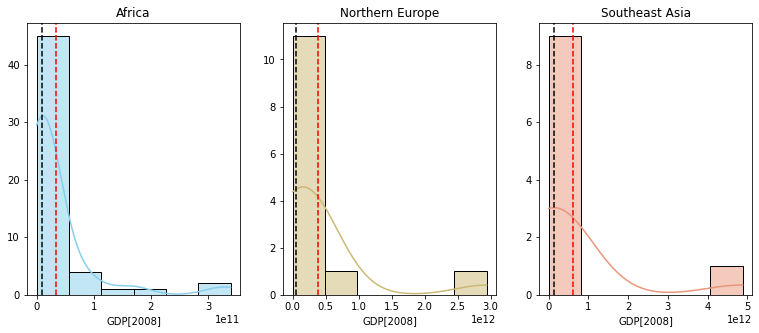

In [16]:
plot_graph(df1 , df2 , df3 , "GDP[2008]")

### GDP[2018] with outlier : Africa , Northern Europe , Southeast Asia

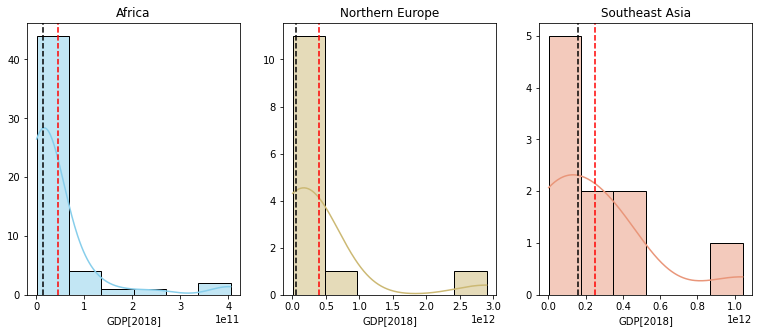

In [17]:
df1 , df2 , df3 = set_data(dfb)
plot_graph(df1 , df2 , df3 , "GDP[2018]")

### GDP[2008] without outlier : Africa , Northern Europe , Southeast Asia

In [18]:
df1 , df2 , df3 = set_data(dfa)
df1 = remove_outlier_IQR(df1,"GDP[2008]")
df2 = remove_outlier_IQR(df2,"GDP[2008]")
df3 = remove_outlier_IQR(df3,"GDP[2008]")

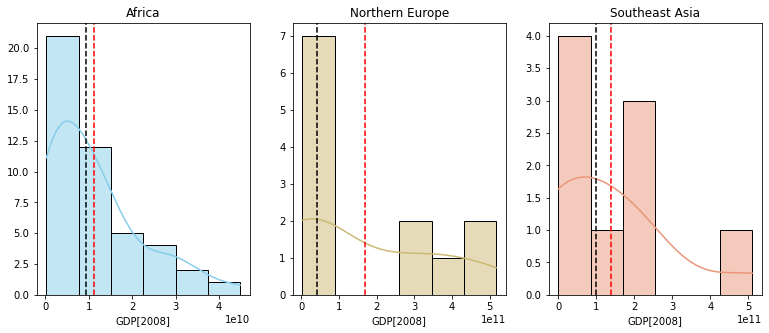

In [19]:
plot_graph(df1 , df2 , df3 , "GDP[2008]")

### GDP[2018] without outlier : Africa , Northern Europe , Southeast Asia

In [20]:
df1 , df2 , df3 = set_data(dfb)

In [21]:
df1 = remove_outlier_IQR(df1,"GDP[2018]")
df2 = remove_outlier_IQR(df2,"GDP[2018]")
df3 = remove_outlier_IQR(df3,"GDP[2018]")

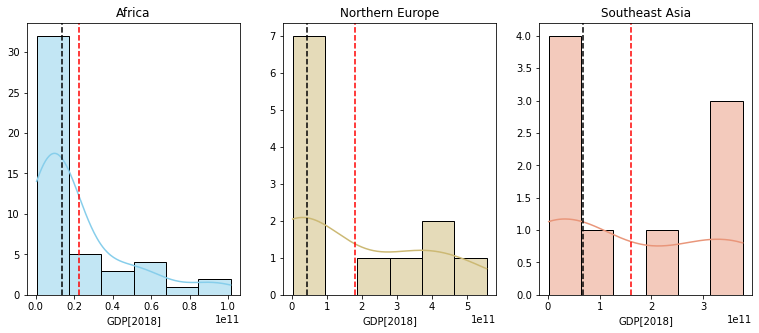

In [22]:
plot_graph(df1 , df2 , df3 , "GDP[2018]")

# Population

In [23]:
population = pd.read_csv('population.csv')

<AxesSubplot:>

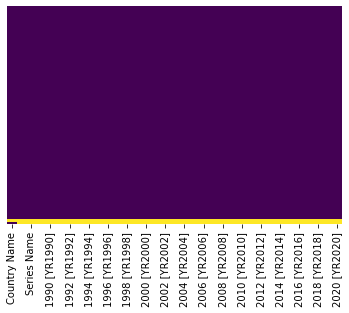

In [24]:
sns.heatmap(population.isnull() , yticklabels=False, cbar=False , cmap='viridis')

<AxesSubplot:>

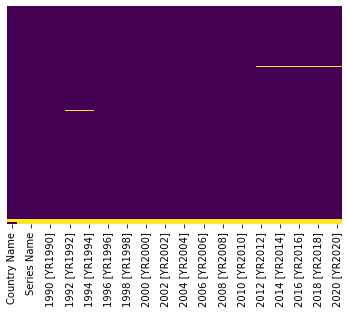

In [25]:
population = population.replace({'..':np.nan})
sns.heatmap(population.isnull() , yticklabels=False, cbar=False , cmap='viridis')

In [26]:
dfa = regions.join(population['2008 [YR2008]'])
dfb = regions.join(population['2018 [YR2018]'])

<AxesSubplot:>

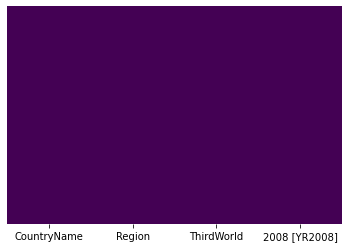

In [27]:
sns.heatmap(dfa.isnull() , yticklabels=False, cbar=False , cmap='viridis')

In [28]:
# remove region that is not assigned
remove_not_assign_region(dfa)
remove_not_assign_region(dfb)
        
dfa.drop(["ThirdWorld"] , axis=1 , inplace=True)
dfb.drop(["ThirdWorld"] , axis=1 , inplace=True)
dfa.dropna(inplace=True)
dfb.dropna(inplace=True)

<AxesSubplot:>

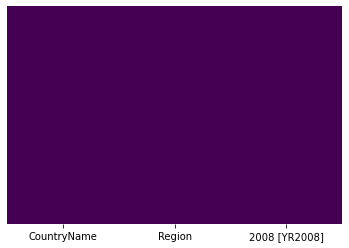

In [29]:
sns.heatmap(dfa.isnull() , yticklabels=False, cbar=False , cmap='viridis')

In [30]:
dfa.rename(columns = {'2008 [YR2008]':'Population[2008]'}, inplace=True)
dfb.rename(columns = {'2018 [YR2018]':'Population[2018]'}, inplace=True)
dfa = dfa.astype({'Population[2008]':float})
dfb = dfb.astype({'Population[2018]':float})

### Population[2008] with outlier : Africa , Northern Europe , Southeast Asia

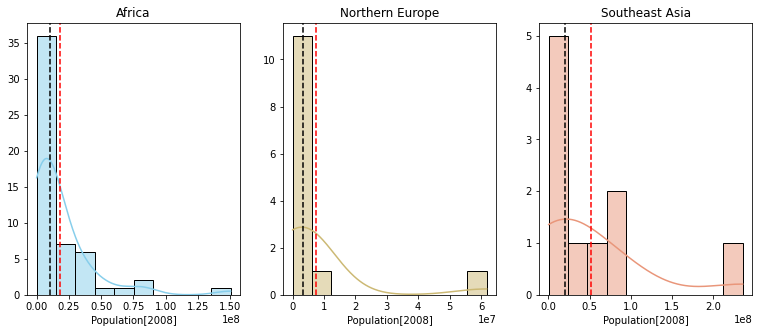

In [31]:
df1 , df2 , df3 = set_data(dfa)
plot_graph(df1 , df2 , df3 , "Population[2008]" , bins=10)

### Population[2018] with outlier : Africa , Northern Europe , Southeast Asia

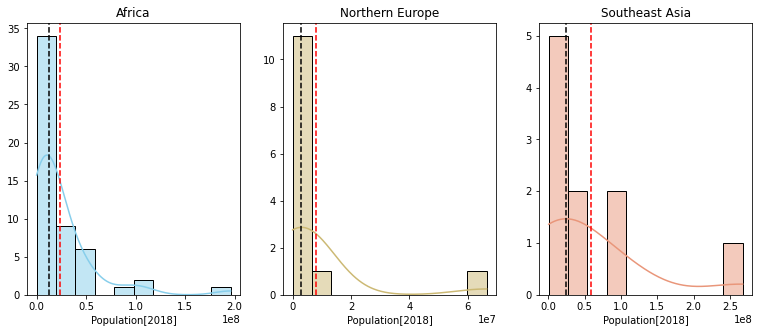

In [32]:
df1 , df2 , df3 = set_data(dfb)
plot_graph(df1 , df2 , df3 , "Population[2018]" , bins=10)

### Population[2008] without outlier : Africa , Northern Europe , Southeast Asia

In [33]:
df1 , df2 , df3 = set_data(dfa)
df1 = remove_outlier_IQR(df1,"Population[2008]")
df2 = remove_outlier_IQR(df2,"Population[2008]")
df3 = remove_outlier_IQR(df3,"Population[2008]")

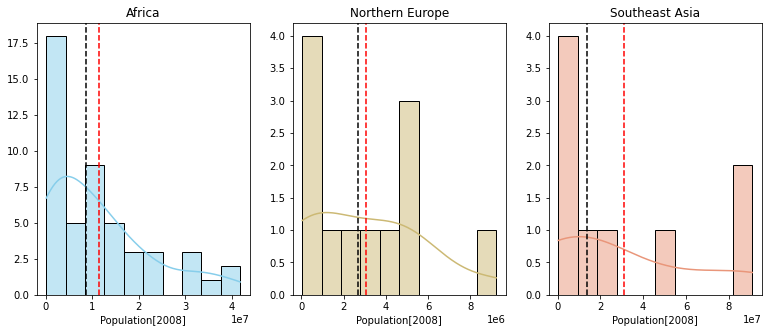

In [34]:
plot_graph(df1 , df2 , df3 , "Population[2008]", bins=10)

### Population[2018] without outlier : Africa , Northern Europe , Southeast Asia

In [35]:
df1 , df2 , df3 = set_data(dfb)
df1 = remove_outlier_IQR(df1,"Population[2018]")
df2 = remove_outlier_IQR(df2,"Population[2018]")
df3 = remove_outlier_IQR(df3,"Population[2018]")

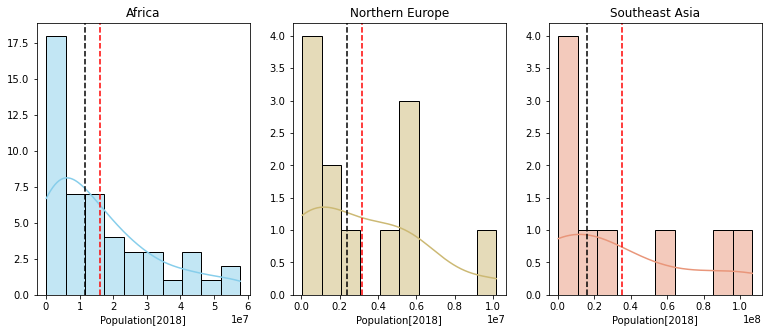

In [36]:
plot_graph(df1 , df2 , df3 , "Population[2018]" , bins=10)

# Unemployment

In [37]:
unemployment = pd.read_csv('unemployment.csv')

<AxesSubplot:>

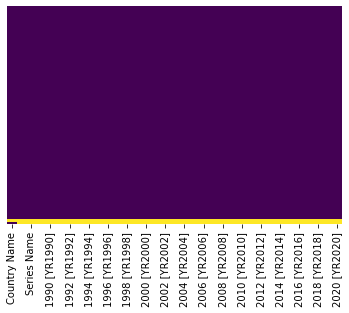

In [38]:
sns.heatmap(unemployment.isnull() , yticklabels=False, cbar=False , cmap='viridis')

<AxesSubplot:>

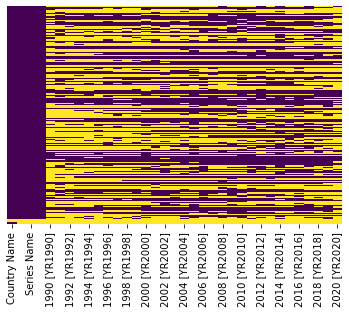

In [39]:
unemployment = unemployment.replace({'..':np.nan})
sns.heatmap(unemployment.isnull() , yticklabels=False, cbar=False , cmap='viridis')

In [40]:
# unemployment.count()

In [41]:
dfa = regions.join(unemployment['2005 [YR2005]'])
dfb = regions.join(unemployment['2017 [YR2017]'])
# df[df["Region"] == 'Southeast Asia']
# dfa

<AxesSubplot:>

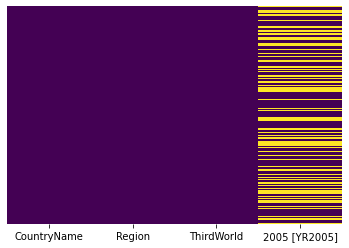

In [42]:
sns.heatmap(dfa.isnull() , yticklabels=False, cbar=False , cmap='viridis')

In [43]:
# remove region that is not assigned
remove_not_assign_region(dfa)
remove_not_assign_region(dfb)
        
dfa.drop(["ThirdWorld"] , axis=1 , inplace=True)
dfb.drop(["ThirdWorld"] , axis=1 , inplace=True)
dfa.dropna(inplace=True)
dfb.dropna(inplace=True)

<AxesSubplot:>

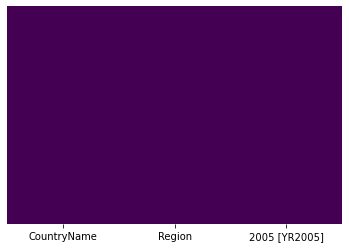

In [44]:
sns.heatmap(dfa.isnull() , yticklabels=False, cbar=False , cmap='viridis')

In [45]:
dfa.rename(columns = {'2005 [YR2005]':'Unemployment[2005]'}, inplace=True)
dfb.rename(columns = {'2017 [YR2017]':'Unemployment[2017]'}, inplace=True)
dfa = dfa.astype({'Unemployment[2005]':float})
dfb = dfb.astype({'Unemployment[2017]':float})

### Unemployment[2005] with outlier : Africa , Northern Europe , Southeast Asia

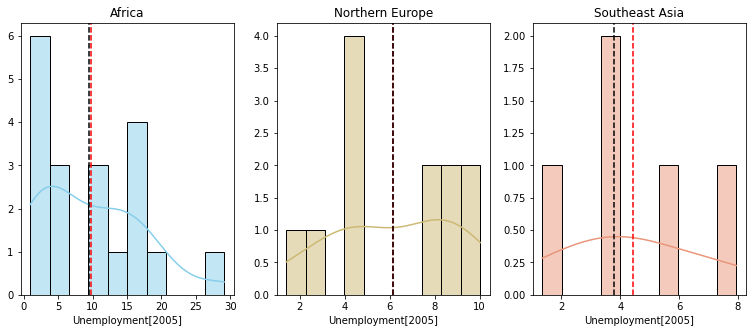

In [46]:
df1 , df2 , df3 = set_data(dfa)
plot_graph(df1 , df2 , df3 , "Unemployment[2005]" , log=False , bins=10)

### Unemployment[2017] with outlier : Africa , Northern Europe , Southeast Asia

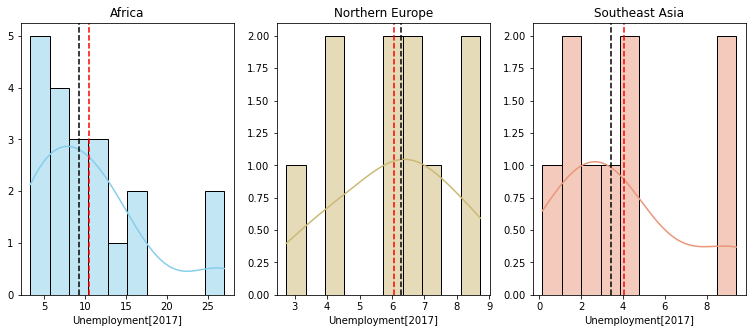

In [47]:
df1 , df2 , df3 = set_data(dfb)
plot_graph(df1 , df2 , df3 , "Unemployment[2017]" , log=False , bins=10)

### Unemployment[2005] without outlier : Africa , Northern Europe , Southeast Asia

In [48]:
df1 , df2 , df3 = set_data(dfa)
df1 = remove_outlier_IQR(df1,"Unemployment[2005]")
df2 = remove_outlier_IQR(df2,"Unemployment[2005]")
df3 = remove_outlier_IQR(df3,"Unemployment[2005]")

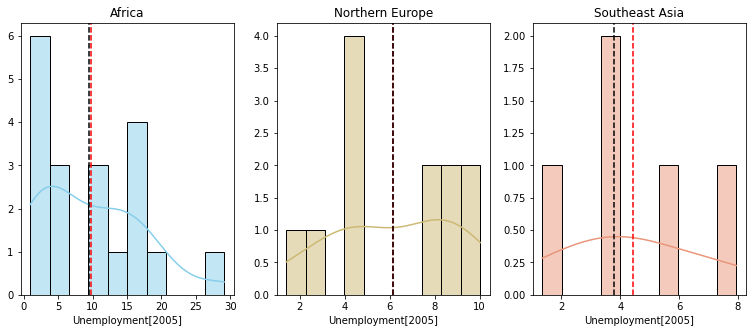

In [49]:
plot_graph(df1 , df2 , df3 , "Unemployment[2005]" , log=False , bins=10)

### Unemployment[2017] without outlier : Africa , Northern Europe , Southeast Asia

In [50]:
df1 , df2 , df3 = set_data(dfb)
df1 = remove_outlier_IQR(df1,"Unemployment[2017]")
df2 = remove_outlier_IQR(df2,"Unemployment[2017]")
df3 = remove_outlier_IQR(df3,"Unemployment[2017]")

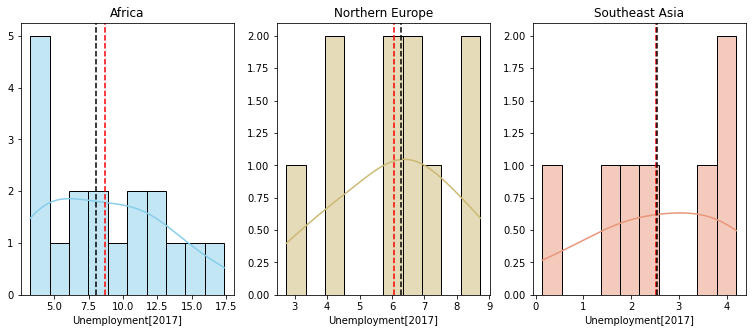

In [51]:
plot_graph(df1 , df2 , df3 , "Unemployment[2017]" , log=False, bins=10)